In [23]:
import pandas as pd
from scipy.stats import spearmanr as sp

print("HI")
data = open('World_Data.csv', 'r', encoding="ISO-8859-1");
# Read Bryan's file
df = pd.read_csv(data)
a = [column for column in df]
del df[a[0]]

HI
   Year  Population (1000 persons)  \
0  1961                3090305.279   
1  1962                3149244.245   
2  1963                3210271.352   
3  1964                3273670.772   
4  1965                3339592.688   

   Area with Permanent Snow/Glaciers (CCI-LC, 1000 ha)  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Major livestock density in agricultural areas (LSU/ha)  \
0                                             125.44        
1                                             131.79        
2                                             135.30        
3                                             129.70        
4                                             135.18        

   Total Emissions of CO2eq (gigagrams)  \
0        

No handles with labels found to put in legend.


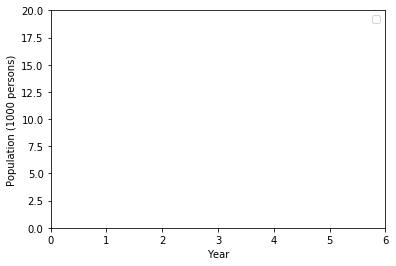

In [36]:
x_col = 1
y_col = 2

k = df[a[y_col]]

fin = []
sec = []
count = 0
for val in k:
    if(int(val)!=0):
        fin.append(val)
        sec.append(df[a[x_col]][count])
        
    count+=1
    
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.plot(sec, fin)

plt.xlabel(a[x_col])
plt.ylabel(a[y_col])

plt.legend()
#plt.show()

In [62]:
import multiprocessing as mp
import random
import time
import numpy as np
from scipy.stats import spearmanr as sp

# Make all combinations for Spearman
fins = []
for col in df:
    for sec_col in df:
        tot = [col, sec_col]
        tot.sort()
        
        fins.append(tot)

# Remove duplicates
proper = list(set(map(tuple,fins)))

split_ways = 14
final = [[] for i in range(0, split_ways)]

for i in range(0, len(proper)):
    final[i%split_ways].append(proper[i])

print(np.asarray(final).shape)


print(mp.cpu_count())

global alls
alls = []

# spearman function
def spearman(L, df, arra):
    for group in arra:
        row = []
        row.append(group[0])
        row.append(group[1])
        rho, p = sp(df[group[0]], df[group[1]])
        row.append(rho)
        L.append(row)

procc = []

start = time.time()

print("Started")
with mp.Manager() as manager:
    L = manager.list()
    for i in range(0, 14):
        procc.append(mp.Process(target=spearman, args=(L, df, final[i])))
        procc[i].start()

    for i in range(0, 14):
        procc[i].join()
    
    alls = list(L)

print("Finishing")
    
end = time.time()
print("Multiprocessing Time: "+str(end-start)) #fast!

pd.DataFrame(np.asarray(alls)).to_csv("spearm.csv")

(14,)
16
Started


/home/gautom/anaconda3/envs/pyenv35/lib/python3.5/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/gautom/anaconda3/envs/pyenv35/lib/python3.5/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/gautom/anaconda3/envs/pyenv35/lib/python3.5/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/gautom/anaconda3/envs/pyenv35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/gautom/anaconda3/envs/pyenv35/lib/python3.5/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/gautom/anaconda3/envs/pyenv35/lib/python3.5/site-packages/numpy/lib/function_base.py:2401:

Finishing
Multiprocessing Time: 0.32311582565307617


In [24]:
import numpy as np

x2n=np.random.randn(100,2)
y2n=np.random.randn(100,2)


[0      8
1     19
2     29
3     17
4     25
5     22
6      6
7      0
8     24
9     11
10    38
11     7
12    32
13    15
14     9
15    10
16    14
17    33
18    39
19    18
20     2
21    36
22     1
23    20
24    12
25    27
26    13
27    23
28     3
29    37
30    26
31    31
32    30
33    35
34    21
35     5
36     4
37    34
38    28
39    16
Name: name, dtype: int64, 0      9
1     31
2     26
3     22
4      3
5     13
6     28
7     15
8     20
9     12
10    14
11    24
12    10
13    27
14    39
15     6
16    30
17    16
18    29
19    19
20    33
21     5
22    37
23    35
24    11
25    23
26    36
27     1
28    21
29     4
30     2
31    17
32    34
33     8
34    32
35     7
36    25
37    38
38    18
39     0
Name: type, dtype: int64]
[[ 1.  1. -1. ...  1. -1. -1.]
 [ 1.  1. -1. ...  1. -1. -1.]
 [-1. -1.  1. ... -1.  1.  1.]
 ...
 [ 1.  1. -1. ...  1. -1. -1.]
 [-1. -1.  1. ... -1.  1.  1.]
 [-1. -1.  1. ... -1.  1.  1.]]
[[nan nan nan ... nan nan nan]
 [na

In [64]:
filter_val = 0.95

for val in alls:
    if(val[2]>=filter_val and val[2]<1):
        print(val)

['Industrial Production (% Relative to 2015)', 'Total (Eco. Footprint, gha)', 0.9835142226493659]
['Major livestock density in agricultural areas (LSU/ha)', 'Year', 0.9886534518113466]
['Cropland (Eco. Footprint, gha)', 'Total (Eco. Footprint, gha)', 0.9954887218045115]
['Built-up Land (Eco. Footprint, gha)', 'Major livestock density in agricultural areas (LSU/ha)', 0.9883116883116884]
['Area with Permanent Snow/Glaciers (CCI-LC, 1000 ha)', 'Area with Permanent Snow/Glaciers (CCI-LC, 1000 ha)', 0.9999999999999999]
['Emissions of CO2eq from Waste (gigagrams)', 'Total Emissions of CO2eq (gigagrams)', 0.9983725135623869]
['Population (1000 persons)', 'Total (Biocapacity, gha)', 0.9974709501025291]
['Built-up Land (Biocapacity, gha)', 'Year', 0.9995898838004101]
['Use of Nitrogen per area of cropland (kg/ha)', 'Use of Nitrogen per area of cropland (kg/ha)', 0.9999999999999999]
['Fishing Grounds (Eco. Footprint, gha)', 'Population (1000 persons)', 0.9847573479152427]
['Carbon (Eco. Footprin

56


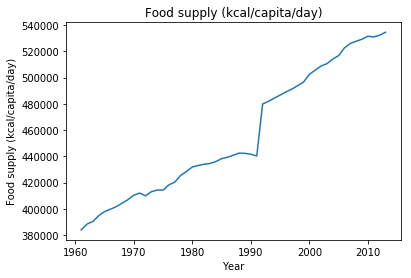

In [76]:
x_col = 'Year'
y_col = 'Food supply (kcal/capita/day)'
#x_col = 'Population (1000 persons)'

k = df[y_col]

print(len(k))

fin = []
sec = []
count = 0
for val in k:
    if(int(val)!=0):
        fin.append(val)
        sec.append(df[x_col][count])
        
    count+=1
    
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.plot(sec, fin)

plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(y_col)

plt.show()

In [75]:
[val for val in a]

['Unnamed: 0',
 'Year',
 'Population (1000 persons)',
 'Area with Permanent Snow/Glaciers (CCI-LC, 1000 ha)',
 'Major livestock density in agricultural areas (LSU/ha)',
 'Total Emissions of CO2eq (gigagrams)',
 'Emissions of CO2eq from Agriculture (gigagrams)',
 'Emissions of CO2eq from Energy Production (gigagrams)',
 'Emissions of CO2eq from Land Use Sources (gigagrams)',
 'Emissions of CO2eq from Forests (gigagrams)',
 'Emissions of CO2eq from Waste (gigagrams)',
 'Emissions of CO2eq from Other Sources (gigagrams)',
 'Emissions of CO2eq from Transportation (gigagrams)',
 'Use of Nitrogen per area of cropland (kg/ha)',
 'Use of Phosphate per area of cropland (kg/ha)',
 'Use of Potash per area of cropland (kg/ha)',
 'Use of Pesticides per area of cropland (kg/ha)',
 'Food supply (kcal/capita/day)',
 'Industrial Production (% Relative to 2015)',
 'Average Annual Precipitation (mm/year)',
 'Total Renewable Water Resources (10^9 m^3/year)',
 'Total Renewable Water Resources Per Capita (m